# Assignment 3: Neural Networks - Oscar Hernandez 

## Purpose

The purpose of this report will be to build several neural networks utilizing the MNIST dataset (images of digits 0-9). This is all part of the exploratory work being completed to evaluate machine learning technologies as it pertains to optical character recognition. Neural networks can be used for a variety of reasons but in this case it will be for classification purposes. Furthermore, this report will compare each of the neural networks using a benchmark experiment that uses a 2x2 factorial design. The factors that will be used are number of layers and nodes per layer. Various hyperparameter settings will be used. We will output the results of the benchmark experiment, draw conclusions from these results and make a recommendation on which neural network we believe is most trusthworthy.  

#### This report will be broken up into Sections that cover the specific methodology that went into arriving at the final recommendation. The report will include and/or cover, at minimum, the following specific items and/or tasks:
* Explore the MNIST data set to get a quick understanding of its structure and standardize the entire data set  
* Train 4 neural networks using the MNIST data set using different hyperparameter settings and factors
* Record the time it took to train each neural network and the accuracy on the training data set
* Test each neural network on a test set and record its accuracy 
* Provide final management recommendation 


### Section 1 - Exploratory Data Analysis & Preparation

#### The first step in building a machine learning model is to gain a firm understanding of the data that will be used to train the model. Section 1 covers all the work that was completed as part of the Exploratory Data Analysis (EDA) process along with comments explaining code and output wherever necessary. Section 1 also covers any data preparation steps that were taken prior to building out the neural networks.. 

In [1]:
#Load all the necessary packages we need to complete the exercise

import warnings
warnings.simplefilter('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
import nbconvert
from sklearn.metrics import accuracy_score
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
import tensorflow as tf

In [4]:
#Import the MNIST train data set which is 60,000 instances
#Display the shape of the newly created object
train = pd.read_csv("mnist_train.csv")
train.shape

(60000, 785)

In [5]:
#Outputs a statistical description of the training data set
#We made a generic subset for formatting purposes 
#The key item to note is that we will need to scale it 
#based on the values that we see from the output
quick_subset = train.iloc[:, 15:20]
quick_subset.describe()

,1x15,1x16,1x17,1x18,1x19
count,60000.000000,60000.000000,60000.0,60000.0,60000.0
mean,0.003600,0.000150,0.0,0.0,0.0
std,0.881816,0.036742,0.0,0.0,0.0
min,0.000000,0.000000,0.0,0.0,0.0
25%,0.000000,0.000000,0.0,0.0,0.0
50%,0.000000,0.000000,0.0,0.0,0.0
75%,0.000000,0.000000,0.0,0.0,0.0
max,216.000000,9.000000,0.0,0.0,0.0


In [6]:
#Import the MNIST test data set which is 10,000 instances
#Display the shape of the newly created object
test = pd.read_csv("mnist_test.csv")
test.shape

(10000, 785)

In [7]:
#Next, split the labels from train and test data set
X_train = train.drop("label", axis =1)
y_train = train["label"].copy()
X_test = test.drop("label", axis =1)
y_test = test["label"].copy()

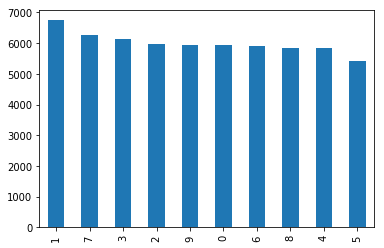

In [8]:
#Let's quickly take a look at the digit distribution in the
#training data set
#We can see an uneven distribution of the training data set
bar = train['label'].value_counts().plot(kind='bar')
plt.show()

In [9]:
#Now, we need to scale the training and test sets
#This will help with the accuracy of the model 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train);
X_test_scaled = scaler.fit_transform(X_test);

###### Key Takeaways 
* In this section, we started by simply loaded our training and test data sets from CSV files 
* Next, we split the labels from each data set 
* We plotted a distribition of the digits in the training data set and noticed that not all the digits appear in the same amount
* The final step was then to utilize StandardScaler to scale both the training and test data sets, which will help with the accuracy of our neural networks

### Section 2 - Build Neural Networks

#### To build out the neural networks, we will be utilized Tensorflow which is arguably the most popular library used for these kinds of exercises. Tensorflow has a clean interface, is scalable and flexible. As discussed, each neural network will have different hyperparameters which will produce different outcomes. This is a part of the benchmark experiment. 

#### We will be using Tensorflow's high-level API TF.learn to complete this task. Also, we will be recording the time it takes to train each model. 

#####  Classifier 1 Specs
* Two hidden layers
* 10 nodes per layer 
* ReLU activation function
* 1000 training iterations using 20 batches of instances

In [ ]:
#This code uses the DNNClassifier method to create the model object 
#with certain hyperparameters
#Then the scaled training data and training labels are used to train it
#We are also timing how long this block of code took to execute

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)

clf1_start_time =time.time()

dnn_clf1 = tf.contrib.learn.DNNClassifier(hidden_units=[10,10], 
                                          n_classes=10,
                                         feature_columns=feature_cols, 
                                         activation_fn = "relu")
dnn_clf1 = tf.contrib.learn.SKCompat(dnn_clf1) 
dnn_clf1.fit(X_train_scaled, y_train, batch_size=20, steps=1000)

clf1_elapsed_time = time.time() - clf1_start_time

#####  Classifier 2 Specs
* Two hidden layers
* 20 nodes per layer 
* Sigmoid activation function
* 1000 training iterations using 20 batches of instance

In [ ]:
clf2_start_time =time.time()

dnn_clf2 = tf.contrib.learn.DNNClassifier(hidden_units=[20,20], 
                                          n_classes=10,
                                         feature_columns=feature_cols, 
                                         activation_fn = "sigmoid")
dnn_clf2 = tf.contrib.learn.SKCompat(dnn_clf2)  
dnn_clf2.fit(X_train_scaled, y_train, batch_size=20, steps=1000)

clf2_elapsed_time = time.time() - clf2_start_time

#####  Classifier 3 Specs
* Four hidden layers
* 10 nodes per layer 
* ReLU activation function
* 2000 training iterations using 40 batches of instance

In [ ]:
clf3_start_time =time.time()

dnn_clf3 = tf.contrib.learn.DNNClassifier(hidden_units=[10,10,10,10],
                                          n_classes=10,
                                         feature_columns=feature_cols, 
                                         activation_fn = "relu")
dnn_clf3 = tf.contrib.learn.SKCompat(dnn_clf3)  
dnn_clf3.fit(X_train_scaled, y_train, batch_size=40, steps=2000)

clf3_elapsed_time = time.time() - clf3_start_time

#####  Classifier 4 Specs
* Four hidden layers
* 20 nodes per layer 
* Sigmoid activation function
* 2000 training iterations using 40 batches of instance

In [ ]:
clf4_start_time =time.time()

dnn_clf4 = tf.contrib.learn.DNNClassifier(hidden_units=[20, 20, 20, 20],
                                          n_classes=10,
                                         feature_columns=feature_cols, 
                                         activation_fn = "sigmoid")
dnn_clf4 = tf.contrib.learn.SKCompat(dnn_clf4)  
dnn_clf4.fit(X_train_scaled, y_train, batch_size=40, steps=2000)

clf4_elapsed_time = time.time() - clf4_start_time

##### Key Takeaways
* This section was where we trained each neural network using the training data set 
* As discussed, we used a 2x2 design for the layers and nodes per layers 
* The first two models had 2 hidden layers and either 10 nodes or 20 nodes, respectively 
* The last two models had 4 hidden layers and either 10 nodes or 20 nodes, respectively
* We alternated between activation functions -- choosing either ReLU or Sigmoid
* Lastly, we changed between training iterations and batch sizes which is noted in the description
* Overall, as expected, the development time for the first two models was faster given that iterations and hidden layer hyperparameters were smaller  

### Section 4 - Model Validation

#### This section will  calculate the classification accuracy for the training and test sets for each model 

In [14]:
#Classifier 1
#This code uses the classifer that was built earlier.  
#Scikit-Learn module is used to output Subset accuracy which is the
#percentage of samples that have all their labels classified correctly
#Train
y_pred1_train = dnn_clf1.predict(X_train_scaled)
accuracy_score(y_train, y_pred1_train['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HERNA_~1\AppData\Local\Temp\tmpj4o1ycab\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.90575

In [15]:
#Test
y_pred1_test = dnn_clf1.predict(X_test_scaled)
accuracy_score(y_test, y_pred1_test['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HERNA_~1\AppData\Local\Temp\tmpj4o1ycab\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9074

In [16]:
#Classifier 2
#Train
y_pred2_train = dnn_clf2.predict(X_train_scaled)
accuracy_score(y_train, y_pred2_train['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HERNA_~1\AppData\Local\Temp\tmpn17a472w\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.8694666666666667

In [17]:
#Test
y_pred2_test = dnn_clf2.predict(X_test_scaled)
accuracy_score(y_test, y_pred2_test['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HERNA_~1\AppData\Local\Temp\tmpn17a472w\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.8698

In [18]:
#Classifier 3
#Train
y_pred3_train = dnn_clf3.predict(X_train_scaled)
accuracy_score(y_train, y_pred3_train['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HERNA_~1\AppData\Local\Temp\tmpcxoa73vl\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9243666666666667

In [19]:
#Test
y_pred3_test = dnn_clf3.predict(X_test_scaled)
accuracy_score(y_test, y_pred3_test['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HERNA_~1\AppData\Local\Temp\tmpcxoa73vl\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9224

In [20]:
#Classifier 4
#Train
y_pred4_train = dnn_clf4.predict(X_train_scaled)
accuracy_score(y_train, y_pred4_train['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HERNA_~1\AppData\Local\Temp\tmpjp55gjz3\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.37935

In [21]:
#Test
y_pred4_test = dnn_clf4.predict(X_test_scaled)
accuracy_score(y_test, y_pred4_test['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HERNA_~1\AppData\Local\Temp\tmpjp55gjz3\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.3768

### Key Takeaways
* We used a holdout data set to make predictions using each of our classifiers 
* The results were divergent across all four sets which was an interesting outcome 
* Within each classifier, the accuracy scores between the training and test data sets were similar which can be interpreted as lack of overfitting. In other words, if the scores on the test data were lower than the training data, then we could infer overfitting exists
* Another interesting observation is that the classifiers with less hidden layers performed better on average than the ones with more hidden layers (the classifiers with less hidden layers also had less training iterations and batch sizes)
* The worst model as measured by the accuracy scores was Classifier 4 which had a value approximately less than half of the best model (Classifier 3) 

### Section 5 - Benchmark Experiment Results and Final Recommendation

The conclusion from the benchmark study is that we should use Classifier 1. This neural network had the shortest processing time (6.75 seconds) compared to the other three classifiers and it had a accuracy score slightly over 90%, which was the second highest. The classifier that had a higher score took more than twice as long to build. We believe this is a suitable tradeoff because for a larger data set (also, one that we assume will continue to grow in order to keep training our model in the future), processing time becomes more important. A neural network with a slower processing time could have a real negative impact on the business. Overall, we recommend using a neural network with 2 hidden layers, 10 nodes per layer, ReLU activation function, 1000 training iterations, batch size of 20 and the default Adagrad optimizer. 

![alt text](Table.jpg "Table")